# 환경설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 불러오기

In [4]:
ccs = pd.read_csv('/content/drive/MyDrive/01_AI 프로젝트/01_건축IT/건축IT 팀플/Concrete Compressive Strength.csv')

input = ccs[['Cement (component 1)(kg in a m^3 mixture)',
          'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
          'Fly Ash (component 3)(kg in a m^3 mixture)',
          'Water  (component 4)(kg in a m^3 mixture)',
          'Superplasticizer (component 5)(kg in a m^3 mixture)',
          'Age (day)']].to_numpy()

target = ccs['Concrete compressive strength(MPa, megapascals) '].to_numpy()  # 출력 변수

ccs.head(n=10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540,0,0,162,3,1040,676,28,80
1,540,0,0,162,3,1055,676,28,62
2,333,143,0,228,0,932,594,270,40
3,333,143,0,228,0,932,594,365,41
4,199,132,0,192,0,978,826,360,44
5,266,114,0,228,0,932,670,90,47
6,380,95,0,228,0,932,594,365,44
7,380,95,0,228,0,932,594,28,36
8,266,114,0,228,0,932,670,28,46
9,475,0,0,228,0,932,594,28,39


In [5]:
 # 데이터 나누기(train, test)
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(input, target, test_size=0.2, random_state= 14)

# # input 데이터 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

# # train input -> trian_scaled
train_scaled = ss.transform(train_input)

# test input -> test_scaled
test_scaled = ss.transform(test_input)

print(test_scaled)
print(test_target)

[[ 0.543091    1.36400919 -0.84506483 -0.29470708  0.60998378 -0.62102992]
 [ 1.36874964 -0.59749792  1.2128331  -0.15495724  0.44366127  0.14554618]
 [-0.30176901  1.10560706 -0.84506483  1.056208   -1.05324135 -0.29249731]
 ...
 [-0.08095332  0.37738286  0.43332631  1.33570767  0.44366127 -0.29249731]
 [-1.35784401  0.70625831  0.76071917  0.86987488  0.11101624 -0.29249731]
 [ 0.30307395  2.22143446 -0.84506483 -0.2481238   0.44366127 -0.29249731]]
[35 66 37 56 55 49  7 67 19 31 24 35 24 38 25 52 11 23 13 75 13 40 24 34
 13 11 34 18 14 30 20 41 53 29 42 15 51 19  5 12 56 61 21 20 44 39 11 25
 15 17 62 41 42 42 44 34 65 42 27 33 49 24 37 28 75 33 26  8 44 33 10 36
 39 43 71 31 26 27 47 13 43 18 17 51 62 27 16 56 34 19 56 41 16 44 36 30
 39 26 35  8 29 71 31 44 62 57 18 11 12 59 17 31  8 75 13 40 54 50 23 18
 49 21 10 56 27 24 22 14 32 58 54 25 57 82 67 33 24 24 39 42 26 26 46 32
 15 16 16 54 37 22 37 22 15 45 13 39 47 26 35 35 23 38  9 46 24 15 37 62
 73 37 42 71 56 57 41 59 27 66 34

#머신러닝 알고리즘

##1) KNN Regression

In [6]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(train_scaled, train_target)
test_pred_kn = kn.predict(test_scaled)
print(test_pred_kn)

# # 훈련 정확도
# train_accuracy_kn = (kn.score(train_scaled, train_target))
# print("Trian Accuracy: ", train_accuracy_kn)

# # 정확도
# accuracy_kn= kn.score(test_scaled, test_target)
# print("Test Accuracy: ", accuracy_kn)

# RMSE 계산
rmse_kn = np.sqrt(mean_squared_error(test_target, test_pred_kn))
print("RMSE:", rmse_kn)

# R제곱 계산
r2_kn = r2_score(test_target, test_pred_kn)
print("R-Squared:", r2_kn)

[43.  55.8 23.  41.  52.8 44.8 16.8 58.2 21.6 30.2 22.4 39.6 36.4 43.6
 23.2 39.4 13.2 23.4 11.4 66.6 15.  47.4 25.2 35.6 18.  14.8 39.6 30.6
 16.8 28.4 23.2 37.8 48.2 32.4 38.2 13.  52.6 25.4 14.2 19.2 53.2 51.2
 31.2 17.6 47.2 27.6  7.4 23.2 19.2 17.8 37.6 34.8 49.8 45.  43.6 32.
 65.  39.6 28.8 30.6 45.  26.8 33.2 19.6 62.8 34.  22.6 30.6 40.6 40.
 14.4 25.  25.2 42.2 41.  23.6 24.8 25.  41.8 10.4 49.4 22.2 28.  43.8
 54.  32.4 16.8 51.2 39.8 20.6 49.6 32.6 15.2 41.6 33.4 26.  34.8 25.4
 32.  13.2 35.  41.  34.6 35.4 52.6 51.4 19.8 19.8 17.  59.2 25.  35.
 12.4 58.  24.6 30.4 43.6 46.  39.4 19.8 49.6 22.8  9.2 37.6 28.8 21.8
 31.8 21.6 30.  37.6 48.6 27.  63.2 46.2 59.4 27.2 47.4 30.  48.4 41.2
 27.  34.4 41.  23.4 16.  31.  15.2 48.4 39.  26.6 30.2 26.  11.2 37.6
 14.  46.  50.2 36.6 39.4 39.6 27.4 60.2 19.2 53.8 28.4 18.  34.4 49.6
 69.8 24.4 38.6 41.  60.2 56.8 50.4 56.2 23.8 57.8 41.6 35.4 46.  35.2
 11.6 35.6 19.  34.4 72.4 39.2 39.2 38.6 31.  17.8 31.  44.6 12.2 29.6
 55.  29.

##2) Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_scaled, train_target)
test_pred_lr = lr.predict(test_scaled)
print(test_pred_lr)

# # 훈련 정확도
# train_accuracy_lr = (kn.score(train_scaled, train_target))
# print("Trian Accuracy: ", train_accuracy_lr)

# # 정확도
# accuracy_lr= kn.score(test_scaled, test_target)
# print("Test Accuracy: ", accuracy_lr)

# RMSE 계산
rmse_lr = np.sqrt(mean_squared_error(test_target, test_pred_lr))
print("RMSE:", rmse_lr)

# R제곱 계산
r2_lr = r2_score(test_target, test_pred_lr)
print("R-Squared:", r2_lr)

[45.81078671 54.24863996 28.42590918 51.12336339 41.83381956 53.99931383
 19.38252946 68.61420502 28.941723   26.89427873 24.19909058 30.97224574
 40.48995909 55.18449573 23.00543753 51.77464859 14.34771773 22.87056844
 18.3657508  55.82758427 19.85301064 50.99309529 17.73782036 53.01303706
 22.80514137 20.86511755 33.89335815 33.69438202 22.45663834 26.99061817
 21.61321467 62.9017254  60.32882161 16.86800676 25.64263695 20.90846499
 42.70917845 23.96403808 14.90553135 14.34146119 57.32593505 44.98504558
 29.43803931 33.10519018 40.69974044 35.52178912 16.3609109  23.00543753
 20.7512908  24.15832916 54.69233099 34.9300633  59.50294665 38.32302041
 40.33348187 27.17169386 63.5158049  34.24780024 26.59683135 35.99843274
 27.76124028 40.86721046 32.10547569 30.72859012 62.69795234 35.33940773
 19.87020198 37.65767008 40.87405017 53.54614759 20.2600774  23.4564809
 37.30587614 34.41220818 53.50248616 29.09928367 25.63743038 23.88297845
 35.83887738 13.30687387 49.04433303 22.37185327 22.

## 3) Decision Tree

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 42)
dt.fit(train_scaled, train_target)
test_pred_dt = dt.predict(test_scaled)
print(test_pred_dt)

# # 훈련 정확도
# train_accuracy_dt = (kn.score(train_scaled, train_target))
# print("Trian Accuracy: ", train_accuracy_dt)

# # 정확도
# accuracy_dt= kn.score(test_scaled, test_target)
# print("Test Accuracy: ", accuracy_dt)

# RMSE 계산
rmse_dt = np.sqrt(mean_squared_error(test_target, test_pred_dt))
print("RMSE:", rmse_dt)

# R제곱 계산
r2_dt = r2_score(test_target, test_pred_dt)
print("R-Squared:", r2_dt)


[45.  74.  30.  45.  54.  49.  10.  60.  19.  32.  20.  43.  31.  36.
 22.  38.5 13.  36.  11.  72.  13.  39.  24.  38.  12.  10.  34.  21.
 14.  33.  20.  39.  53.  29.  51.  14.  49.  19.   9.  17.  58.  61.
 13.  16.  41.  28.  11.  22.  17.  13.  60.  41.  43.  42.  42.  33.
 65.  54.  33.  34.  51.  22.  37.  27.  60.  42.  25.  27.  44.  33.
 12.  20.  33.  44.  56.  21.  37.  22.  51.  18.  38.  13.5 17.  52.
 68.  30.  14.  59.  43.  20.  54.  46.  14.  44.  35.  39.  41.  29.
 35.  13.  26.  56.  39.  49.  60.  52.  18.  13.  17.  59.  18.  33.
  8.  50.  30.  31.  54.  50.  25.  18.  52.  18.  11.  44.  33.  30.
 25.   8.  32.  44.  51.  25.  58.  46.  60.  38.  30.  24.  49.  42.
 18.  33.  44.  39.  11.  20.  14.  68.  37.  17.  29.  25.  17.  31.
 12.  39.  38.5 23.  25.  28.  16.  39.   8.  46.  24.  17.  32.  58.
 77.  39.  30.  56.  56.  57.  44.  62.  27.  66.  32.  38.  53.  40.
  5.  54.  22.  39.  60.  38.  43.  56.  29.   6.  26.  25.  12.  30.
 51.  34.  45.  56. 

## 4) Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor() # RF 분류기 인스턴스 생성

# GridSearch를 위한 파라미터 생성
rf_param_grid = {
    'max_depth' : [None, 10, 30, 50],
    'n_estimators': [100, 200, 500, 1000] }

# GridSearch로 최적의 파라미터 탐색
rf_grid = GridSearchCV(rf, param_grid = rf_param_grid, cv = 3, scoring="r2", refit=True) # Cross Validation을 사용하여 최적의 파라미터 탐색
# 'param_grid' : 사용될 파라미터를 딕셔너리 형태로 넣어줌, 'cv' : 교차 검증에서 분할 횟수 지정, 'scoring' : 예측 성능 평가 방법 , 'refit' : True일 경우 best hyperparameter로 모델 재학습
rf_grid.fit(train_scaled, train_target) # 모델 학습
print("Best Average r2_score : {0:.4f}".format(rf_grid.best_score_))
print("Best Hyperparameter : ", rf_grid.best_params_)

best_rf = rf_grid.best_estimator_ # best hyperparameter로 학습된 모델 불러옴
test_pred_rf = best_rf.predict(test_scaled) # best model로 예측
print(test_pred_rf)


# # 훈련 정확도
# train_accuracy_rf = (kn.score(train_scaled, train_target))
# print("Trian Accuracy: ", train_accuracy_rf)

# # 정확도
# accuracy_rf= kn.score(test_scaled, test_target)
# print("Test Accuracy: ", accuracy_rf)

# RMSE 계산
rmse_rf = np.sqrt(mean_squared_error(test_target, test_pred_rf))
print("RMSE:", rmse_rf)

# R제곱 계산
r2_rf = r2_score(test_target, test_pred_rf)
print("R-Squared:", r2_rf)



Best Average r2_score : 0.8765
Best Hyperparameter :  {'max_depth': 50, 'n_estimators': 500}
[38.52487143 67.12433333 33.36733333 44.4581     52.1748     48.723
 10.56066667 61.19893333 20.83231667 31.184      20.33952381 39.718
 32.69       38.676      24.162      39.40708571 12.83933333 33.04466667
 11.09541667 62.3844     13.6432     40.2335     24.5892     41.30266667
 12.534      12.118      35.596      19.00766667 14.00530476 32.238
 21.108      38.9        50.124      30.194      43.486      10.676
 51.1568     21.0896      8.61       19.456      57.79292381 57.99
 10.5555     15.47       41.204      38.028      10.208      24.162
 17.70721905 13.10566667 54.3        35.50333333 45.72       42.226
 42.742      32.76183333 65.06       40.674      30.24786667 31.20795238
 49.6484     24.11863333 34.67493333 25.34906667 62.6816     39.1
 23.874      21.016      44.75       33.074      12.58823333 24.488
 37.332      40.414      61.85609524 24.786      33.594      26.4855
 44.998   

## 5) Support Vector Regression

In [10]:
from sklearn import svm
svr = svm.SVR(kernel='rbf') # kernel 종류 : 'linear', 'poly', 'sigmoid', 'rbf'
svr.fit(train_scaled, train_target)
test_pred_svr = svr.predict(test_scaled)
print(test_pred_svr)

# # 훈련 정확도
# train_accuracy_svr = (kn.score(train_scaled, train_target))
# print("Trian Accuracy: ", train_accuracy_svr)

# # 정확도
# accuracy_svr= kn.score(test_scaled, test_target)
# print("Test Accuracy: ", accuracy_svr)

# RMSE 계산
rmse_svr = np.sqrt(mean_squared_error(test_target, test_pred_svr))
print("RMSE:", rmse_svr)

# R제곱 계산
r2_svr = r2_score(test_target, test_pred_svr)
print("R-Squared:", r2_svr)

[45.42176581 50.37652898 26.69090694 48.80469829 44.56317096 49.09977426
 18.25772843 43.50637922 27.65150881 32.32340025 29.79996604 35.25455771
 36.3559498  41.11608055 23.14153697 46.16437264 15.7509702  27.93889332
 20.90800606 46.13955776 22.02376755 43.14936064 20.20271824 43.5122215
 22.92984925 18.48071784 32.83485856 30.7401778  21.35484884 27.90759539
 24.43926746 38.44868696 41.82562596 32.05461499 35.57286878 21.12568874
 43.59106039 28.97047608 16.10759836 18.30820558 54.89975347 48.16335948
 25.49575832 29.91153935 44.36762497 31.49247346 15.42470202 23.14153697
 19.52241049 22.99285651 44.79890591 35.00265419 42.56231183 41.67831617
 40.74376163 27.40443097 59.82091469 33.73347856 29.83028846 31.51248766
 37.14904769 32.24892635 31.6986933  29.42738694 48.99669014 35.32406333
 20.94184575 34.31024337 39.24751105 48.39050333 19.40831305 24.58529782
 32.03614307 37.12837263 53.20567216 28.8485882  28.1264057  23.84918561
 41.52493889 15.85773199 43.57199462 23.83065915 27.

# visualization

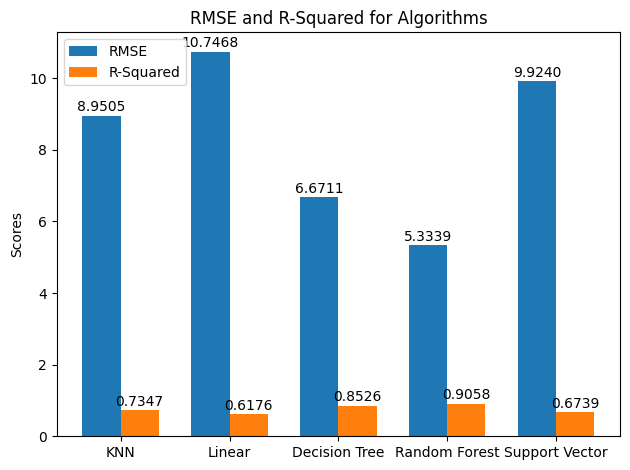

In [11]:
import matplotlib.pyplot as plt

# 알고리즘 이름과 결과값
algorithm_names = ["KNN", "Linear", "Decision Tree", "Random Forest", "Support Vector"]
rmse_values = [rmse_kn, rmse_lr, rmse_dt, rmse_rf, rmse_svr]
r2_values = [r2_kn, r2_lr, r2_dt, r2_rf, r2_svr]

# 그래프 데이터
x = np.arange(len(algorithm_names))
width = 0.35

# RMSE 막대 그래프
fig, ax = plt.subplots()
rects1 = ax.bar(x, rmse_values, width, label='RMSE')

# R제곱 막대 그래프
rects2 = ax.bar(x + width, r2_values, width, label='R-Squared')

# 축, 레이블 등 설정
ax.set_ylabel('Scores')
ax.set_title('RMSE and R-Squared for Algorithms')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(algorithm_names, rotation=0)
ax.legend()

# 값 표시
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 1),
                    textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()